<a href="https://colab.research.google.com/github/Ruwai/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/DS_Unit_4_Sprint_3_Neural_Nets_Spring_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks Sprint Challenge

## 1) Define the following terms:

- Neuron
- Input Layer
- Hidden Layer
- Output Layer
- Activation
- Backpropagation

Neuron: Represents a node in a Neural Network modeled after biological neurons in the brain. They read the activation state of all the neurons in the previous layer sort of like checkpoints, weighs them individually, and passes the sum through a final function that decides on the final output for that particular node.

Input Layer: The first layer of a neural network that includes the building blocks from features in the data fed into the neural network.

Hidden Layer: Layers in between the input and output of a neural network. Existing between the layers are the weights and bias that connects hidden layers.

Output Layer: The last layer of a neural network. Each output node contains a function like the hidden layers, but the output corresponds to the NN's predictions for a single outcome variable. 

Activation Function: The activation function shapes the output of each hidden layer to be useful for the next hidden layer that it will pass through until the NN reaches an output node. All of the nodes in a layer of the NN usually have the same activation function.

Backpropagation: Basically backwards propagation and refers to a specific algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch. It 'assigns blame' to weights and works backwards to nudge the weights until they 'improve' the prediction.


## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

In [1]:
##### Your Code Here #####
import numpy as np
import pandas as pd

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

inputs = np.array([[1,1,1],
                   [1,0,1],
                   [0,1,1],
                   [0,0,1]])

correct_outputs = np.array([[1],
                            [0],
                            [0],
                            [0]])

model = Perceptron(no_of_inputs=3, threshold=100, learning_rate=0.1)
model.train(inputs, correct_outputs)

print("====== AND Gate")
for row in inputs:
    print(f'{row[0]} {row[1]} {row[2]} --> {model.predict(row)}')

====== AND Gate
1 1 1 --> 1
1 0 1 --> 0
0 1 1 --> 0
0 0 1 --> 0


## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


In [2]:
##### Your Code Here #####
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(url)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
y = df['target'].values
X = df.drop(columns=['target']).values

y = y.reshape(-1,1)

print(X.shape)
print(y.shape)

(303, 13)
(303, 1)


In [0]:
class NN(object):
    def __init__(self):
        self.inputs = 13
        self.L1Nodes = 16
        self.L2Nodes = 16
        self.outputNodes = 1

        # Initlize Weights
        self.L1_weights = np.random.randn(self.inputs, self.L1Nodes) # (784x16)
        self.L2_weights = np.random.randn(self.L1Nodes, self.L2Nodes) # (16x16)
        self.output_weights = np.random.randn(self.L2Nodes, self.outputNodes) # (16x10)

    def feed_forward(self, X):
        # Sum and activate flows to L1
        self.activated_L1 = self.sigmoid(np.dot(X, self.L1_weights)) 
        # Sum and activate flows to L2
        self.activated_L2 = self.sigmoid(np.dot(self.activated_L1, self.L2_weights))
        # Sum and activate flows to output
        self.activated_output = self.sigmoid(np.dot(self.activated_L2, self.output_weights))
        return self.activated_output
        
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def backward(self, X, y, output):
        ## backward propgate through the network, calculating error and delta at each layer
        # Output
        self.output_error = y - output # error in this layer
        self.output_delta = self.output_error*self.sigmoidPrime(output) # apply derivative of sigmoid to error
        
        # L2
        self.L2_error = self.output_delta.dot(self.output_weights.T) 
        self.L2_delta = self.L2_error*self.sigmoidPrime(self.activated_L2)
        
        # L1
        self.L1_error = self.L2_delta.dot(self.L2_weights.T) 
        self.L1_delta = self.L1_error*self.sigmoidPrime(self.activated_L1)
        
        
        ## Update all weights
        self.L1_weights += X.T.dot(self.L1_delta) 
        self.L2_weights += self.activated_L1.T.dot(self.L2_delta)
        self.output_weights += self.activated_L2.T.dot(self.output_delta)
        
    def train (self, X, y):
        output = self.feed_forward(X)
        self.backward(X, y, output)

In [9]:
model = NN()
epochs=1000
for i in range(epochs): 
  print('+---------- EPOCH', i+1, '-----------+')
  print("Loss: \n" + str(np.mean(np.square(y - model.feed_forward(X))))) # mean sum squared loss
  print("\n")
  model.train(X, y)

+---------- EPOCH 1 -----------+
Loss: 
0.47426113826977095


+---------- EPOCH 2 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 3 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 4 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 5 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 6 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 7 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 8 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 9 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 10 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 11 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 12 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 13 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 14 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 15 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 16 -----------+
Loss: 
0.45544554455445546


+

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp




+---------- EPOCH 118 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 119 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 120 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 121 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 122 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 123 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 124 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 125 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 126 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 127 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 128 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 129 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 130 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 131 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 132 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 133 -----------+
Los

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [0]:
##### Your Code Here #####
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
seed = 42
np.random.seed(seed)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


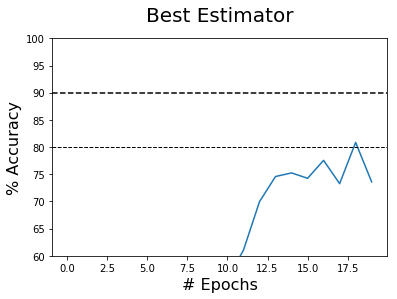

Baseline Cross Validation Score: 0.61716172 used {'batch_size': 20, 'epochs': 20}



In [13]:
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# instantiate model obj
model = KerasClassifier(build_fn=create_model, verbose=0)

# GridSearchCV hyperparameters
batch_size = [20]
epochs = [20]
param_grid = dict(batch_size=batch_size, epochs=epochs)
c_v = StratifiedKFold(n_splits=4,
                      shuffle=True,
                      random_state=seed) # 4-fold CV

# instantiate GridSearchCV obj
cv_grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    n_jobs=-1, 
                    cv=c_v)

# run the cross validation
xval_result = cv_grid.fit(X, y)

# Plot the accuracy 
acc = [x*100 for x in xval_result.best_estimator_.model.history.history['acc']]
fig, ax = plt.subplots()
ax.plot(acc)
ax.set_xlabel('# Epochs', fontsize=16)
ax.set_ylabel('% Accuracy', fontsize=16)
ax.set_ylim(60,100)
ax.axhline(80, color='k', linestyle='--', linewidth=1)
ax.axhline(90, color='k', linestyle='--')
plt.title('Best Estimator', fontsize=20, y=1.05)
plt.show()

# Report Results
print(f"Baseline Cross Validation Score: {xval_result.best_score_:.8f} used {xval_result.best_params_}\n")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/20
303/303 [==============================] - 0s 875us/step - loss: 4.5386 - acc: 0.5116
Epoch 2/20
303/303 [==============================] - 0s 81us/step - loss: 4.2744 - acc: 0.4983
Epoch 3/20
303/303 [==============================] - 0s 71us/step - loss: 3.8836 - acc: 0.4719
Epoch 4/20
303/303 [==============================] - 0s 75us/step - loss: 3.6012 - acc: 0.4686
Epoch 5/20
303/303 [==============================] - 0s 77us/step - loss: 3.1922 - acc: 0.4488
Epoch 6/20
303/303 [==============================] - 0s 74us/step - loss: 2.7794 - acc: 0.4455
Epoch 7/20
303/303 [==============================] - 0s 72us/step - loss: 2.2989 - acc: 0.4389
Epoch 8/20
303/303 [==============================] - 0s 82us/step - loss: 1.8347 - acc: 0.4554
Epoch 9/20
303/303 [==============================] - 0s 73us/step - loss: 1.4637 - acc: 0.5017
Epoch 10/20
303/303 [==============================] - 0s 90us/step - loss: 1.1158 - acc: 0.5281
Epoch 11/20
303/303 [=================

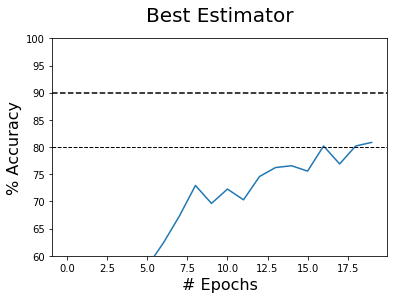

Best Cross Validation Score: 0.58085808 used {'batch_size': 20, 'epochs': 20, 'optimizer': 'nadam'}



NameError: ignored

In [15]:
batch_size = [20]
epochs = [20]
optimizer = ['adam','sgd','rmsprop','nadam']
param_grid = dict(batch_size=batch_size, 
                  epochs=epochs,
                  optimizer=optimizer)
# -----------------------------------------------

# random seed to reproduce later
seed = 42
np.random.seed(seed)

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(16, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# instantiate model obj
model = KerasClassifier(build_fn=create_model, verbose=1)

# GridSearchCV hyperparameters
c_v = StratifiedKFold(n_splits=4,
                      shuffle=True,
                      random_state=seed) # 4-fold CV

# instantiate GridSearchCV obj
cv_grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    n_jobs=-1, 
                    cv=c_v)

# run the cross validation
grid_result = cv_grid.fit(X, y)

# Plot the accuracy 
acc = [x*100 for x in xval_result.best_estimator_.model.history.history['acc']]
fig, ax = plt.subplots()
ax.plot(acc)
ax.set_xlabel('# Epochs', fontsize=16)
ax.set_ylabel('% Accuracy', fontsize=16)
ax.set_ylim(60,100)
ax.axhline(80, color='k', linestyle='--', linewidth=1)
ax.axhline(90, color='k', linestyle='--')
plt.title('Best Estimator', fontsize=20, y=1.05)
plt.show()

# Report Results
print(f"Best Cross Validation Score: {xval_result.best_score_:.8f} used {xval_result.best_params_}\n")
mean_scores = [x*100 for x in grid_result.cv_results_['mean_test_score']]
std_scores  = [x*100 for x in grid_result.cv_results_['std_test_score']]
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(mean_scores, std_scorse, params):
    print(f"Means: {mean:.3f}, Stdev: {stdev:.3f} with: {param}") 